#Relationship between Temperature and Time with every Country in the World

### Using Gausian Mixture Models, Heirarchal clustering and K-Means Clustering

In [ ]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pandas scikit-learn tslearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 368.5/368.5 kB 6.6 MB/s eta 0:00:00


In [ ]:
# add all lib imports here
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from tslearn.clustering import TimeSeriesKMeans
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
import matplotlib.gridspec as gridspec
from sklearn.datasets import make_moons
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
import numpy as np

from sklearn.cluster import OPTICS, cluster_optics_dbscan
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

<ipython-input-79-42fc9b4f6a35>:24: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

<ipython-input-5-444997ff90a3>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


### How was the Data Obtained?
Data collection : - Used Data  from several source like data for
Co2  from EDGAR https://edgar.jrc.ec.europa.eu/report_2022?vis=tot#emissions_table ,
crop Data ( Rice , wheat , soybean , maize) From Our World In Data  (https://ourworldindata.org/grapher/rice-production)
Temp Data from kegal  https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data?select=GlobalLandTemperaturesByCountry.csv
For country code list https://github.com/devanshi-pratiher/covid-air/blob/main/country_codes_3_digit.csv

In [ ]:
mydrive = "/content/drive/My Drive/ML-Summer-2023/The Martians/Data/GlobalLandTemperaturesByCountry.csv"
profdrive="/content/drive/MyDrive/ML-Summer-2023/The Martians/Data"
filename1="GlobalLandTemperaturesByCountry.csv"
filename2="FT2021_fossil_CO2_booklet_2022.xlsx"
filename3="crop_production.csv"
import os
os.chdir(profdrive)
data_temp_country = pd.read_csv(filename1) # till Aug 2013

In [ ]:
data_temp_country = pd.read_csv("/content/drive/My Drive/GlobalLandTemperaturesByCountry.csv") # till Aug 2013

In [ ]:
df_Temp_1970_2012 = (
    data_temp_country
    .pipe(lambda x: x.assign(Year=pd.to_datetime(x.dt).dt.year))
    .query("Year >= 1970 and Year < 2013")
    [['Year', 'AverageTemperature', 'AverageTemperatureUncertainty', 'Country']]
)

In [ ]:
df_Temp_1970_2012

,Year,AverageTemperature,AverageTemperatureUncertainty,Country
2714,1970,-6.495,0.584,Åland
2715,1970,-10.835,0.478,Åland
2716,1970,-1.583,0.608,Åland
2717,1970,0.493,0.463,Åland
2718,1970,6.939,0.565,Åland
...,...,...,...,...
577448,2012,18.946,1.127,Zimbabwe
577449,2012,22.609,0.643,Zimbabwe
577450,2012,23.482,0.574,Zimbabwe
577451,2012,24.606,0.532,Zimbabwe


In [ ]:
df_Temp_avg= df_Temp_1970_2012.groupby(['Country', 'Year'])[['AverageTemperature']].mean().unstack(level=0)

In [ ]:
df_Temp_avg = df_Temp_avg['AverageTemperature']

In [ ]:
# df_Temp_avg = df_Temp_min_max.agg(
#     avgTemp=(np.sum/np.count)
# ).reset_index()

#df_Temp_avg

Transpose the data so that the Years are the columns

In [ ]:
df_Temp_avg=df_Temp_avg.T
df_Temp_avg.reset_index(inplace=True)

Drop Missing Values

In [ ]:
df_Temp_avg[df_Temp_avg.isna().any(axis=1)]

Year,Country,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
8,Antarctica,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_Temp_avg.dropna(inplace=True)

In [ ]:
df_Temp_avg.describe()

Year,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
count,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,...,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000
mean,18.794121,18.588207,18.665612,18.873293,18.631447,18.746662,18.482197,18.922261,18.729517,18.909544,...,19.525087,19.422092,19.499590,19.539135,19.610394,19.423962,19.546385,19.629806,19.456040,19.468744
std,9.306184,9.084674,9.235529,9.279602,8.998934,8.973645,9.165572,9.191682,9.349662,9.319875,...,9.094895,9.072579,9.124147,8.968938,8.918831,8.888759,9.070230,9.273418,8.950056,9.047003
min,-18.738167,-19.710500,-18.818000,-19.273583,-18.205667,-19.524917,-18.025333,-18.150250,-18.448083,-18.585000,...,-16.256250,-17.301167,-16.151250,-17.114333,-17.074167,-17.389917,-17.316417,-15.546333,-17.174333,-16.772250
25%,10.963708,10.720167,10.640021,10.563458,10.806188,10.981646,10.511500,11.056042,10.383542,10.819958,...,11.617563,11.247833,11.265667,11.436313,12.040125,11.802208,11.732583,11.372021,11.756979,11.644333
50%,23.015542,22.663417,22.766458,23.036292,22.629458,22.696875,22.691417,23.116458,22.945292,23.179542,...,23.456125,23.436833,23.571042,23.520833,23.578000,23.478208,23.380458,23.895417,23.465917,23.377125
75%,26.412521,25.962500,26.327000,26.490167,26.052792,26.041708,26.003083,26.431771,26.452854,26.505542,...,27.020708,26.861042,27.080833,27.009646,26.959646,26.669542,26.977750,27.173896,26.768333,26.984188
max,28.989250,28.609333,29.089083,29.114583,28.467333,28.697833,28.716000,29.019417,29.063250,29.035833,...,29.757833,29.540917,29.808583,29.777417,29.786333,29.339250,29.896750,30.127083,29.844333,29.923583


###Data Prepration :
1) Data cleanup :
  We checked and remove na values

2)  from visualization able to find out how temperature and time scale is relevant for each country

3) Transformed data in order to work with clustering from the years and the Country

## Exploratory Data Analysis

In [ ]:
df_Temp_avg.describe()

Year,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
count,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,...,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000
mean,18.794121,18.588207,18.665612,18.873293,18.631447,18.746662,18.482197,18.922261,18.729517,18.909544,...,19.525087,19.422092,19.499590,19.539135,19.610394,19.423962,19.546385,19.629806,19.456040,19.468744
std,9.306184,9.084674,9.235529,9.279602,8.998934,8.973645,9.165572,9.191682,9.349662,9.319875,...,9.094895,9.072579,9.124147,8.968938,8.918831,8.888759,9.070230,9.273418,8.950056,9.047003
min,-18.738167,-19.710500,-18.818000,-19.273583,-18.205667,-19.524917,-18.025333,-18.150250,-18.448083,-18.585000,...,-16.256250,-17.301167,-16.151250,-17.114333,-17.074167,-17.389917,-17.316417,-15.546333,-17.174333,-16.772250
25%,10.963708,10.720167,10.640021,10.563458,10.806188,10.981646,10.511500,11.056042,10.383542,10.819958,...,11.617563,11.247833,11.265667,11.436313,12.040125,11.802208,11.732583,11.372021,11.756979,11.644333
50%,23.015542,22.663417,22.766458,23.036292,22.629458,22.696875,22.691417,23.116458,22.945292,23.179542,...,23.456125,23.436833,23.571042,23.520833,23.578000,23.478208,23.380458,23.895417,23.465917,23.377125
75%,26.412521,25.962500,26.327000,26.490167,26.052792,26.041708,26.003083,26.431771,26.452854,26.505542,...,27.020708,26.861042,27.080833,27.009646,26.959646,26.669542,26.977750,27.173896,26.768333,26.984188
max,28.989250,28.609333,29.089083,29.114583,28.467333,28.697833,28.716000,29.019417,29.063250,29.035833,...,29.757833,29.540917,29.808583,29.777417,29.786333,29.339250,29.896750,30.127083,29.844333,29.923583


In [ ]:
df_Temp_avg

Year,Country,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
0,Afghanistan,14.783083,14.823500,12.547167,14.235500,13.316750,13.548083,13.708583,14.805417,14.329667,...,14.916000,15.770917,14.980000,15.595583,15.106167,15.216500,15.257750,15.828667,15.518000,14.481583
1,Africa,24.321583,23.933083,24.199083,24.400083,23.830417,23.919750,23.911917,24.274250,24.222167,...,25.025583,24.895917,25.156167,24.818917,24.851500,24.754667,25.026500,25.472500,24.786500,24.725917
2,Albania,12.839667,12.534417,12.608250,12.486667,12.559833,12.568417,12.036250,13.223250,12.263583,...,13.626583,13.258167,12.747083,12.976917,13.890500,13.955167,13.844250,13.775417,13.443250,13.768250
3,Algeria,23.322833,22.672250,22.698167,22.886167,22.541000,22.716417,22.356750,23.546083,23.161833,...,24.393667,23.916000,24.222583,24.200833,24.065333,23.950250,24.154333,25.215667,24.144167,23.954833
4,American Samoa,26.760667,26.402250,26.812333,27.138250,26.591250,26.773167,26.721083,26.786833,26.684000,...,27.264833,27.281167,27.373500,27.081250,27.452417,26.995083,27.034250,27.453417,27.009500,27.201417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,Western Sahara,22.981500,21.850417,21.389250,22.491500,21.965583,22.164417,21.597833,22.585917,22.856583,...,23.408917,23.420667,23.507667,23.441833,23.145417,23.323083,23.381083,24.114250,23.401250,23.303417
239,Yemen,26.375917,26.028333,26.486500,26.278833,26.097333,25.695167,25.949000,26.810417,26.695750,...,27.357750,27.334083,27.294667,27.175000,27.310750,26.807500,27.342417,27.302750,27.288250,27.445000
240,Zambia,21.631333,21.190333,21.401083,21.479167,20.784250,21.109417,20.826250,21.561500,21.162083,...,22.156750,21.768083,22.813500,21.784250,21.838500,21.535833,21.670250,22.267500,21.771583,21.697750
241,Zimbabwe,21.798750,21.160250,21.031583,21.460417,20.558250,20.833500,20.691000,21.405000,20.924667,...,21.891250,21.330917,22.509917,21.618750,21.604250,21.545583,21.377250,21.986250,21.602417,21.521333


<ipython-input-18-3c6ec90243de>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_Temp_avg.corr(), annot=True, cmap="coolwarm")


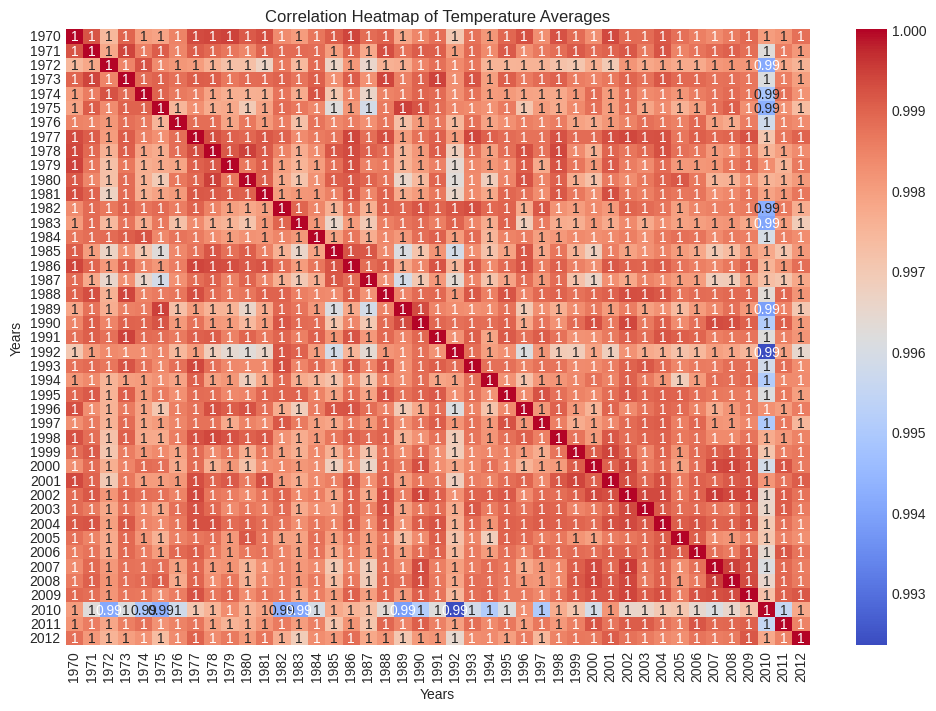

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_Temp_avg.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Temperature Averages")
plt.xlabel("Years")
plt.ylabel("Years")
plt.show()

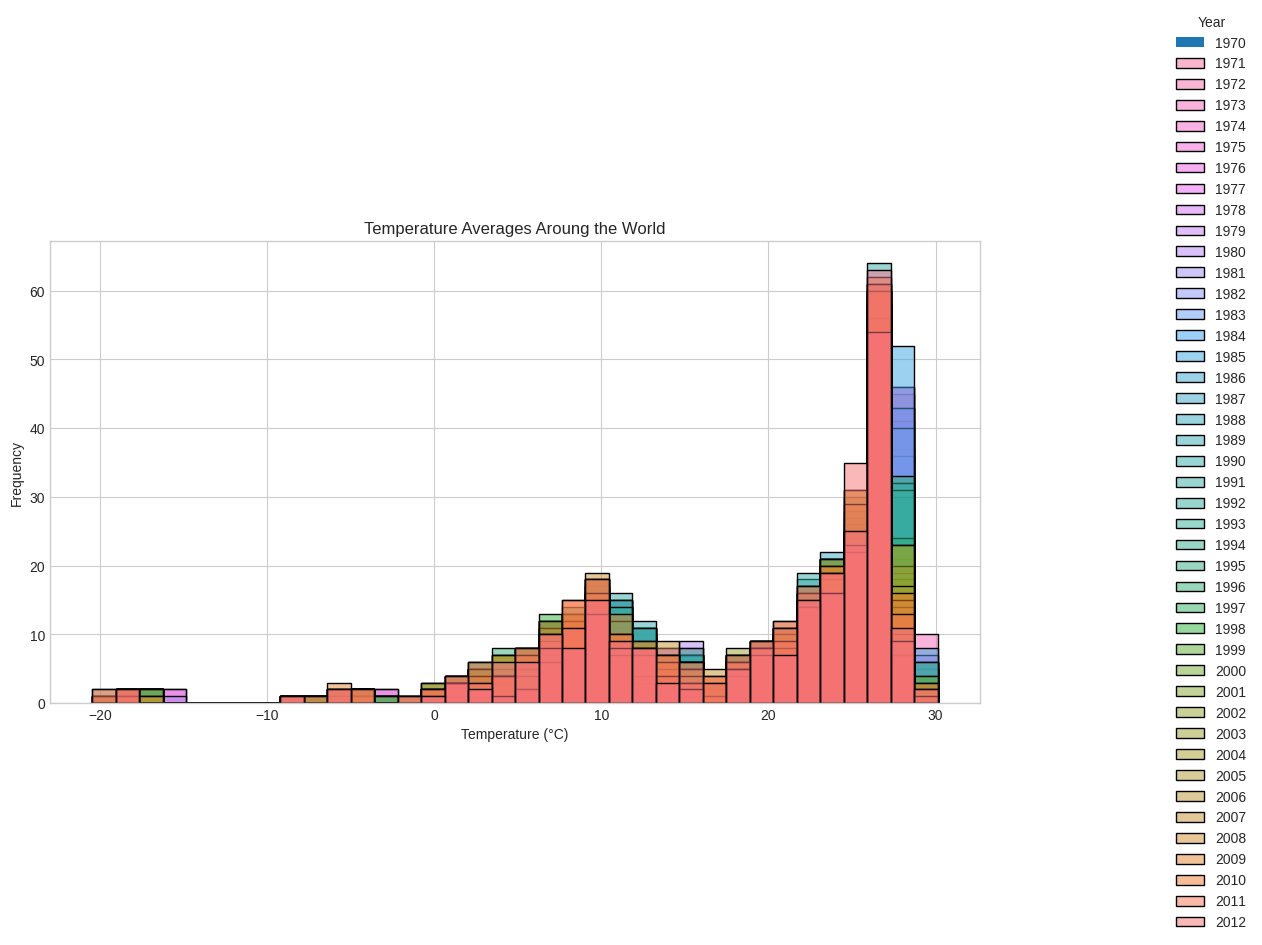

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(df_Temp_avg)
plt.legend(
    df_Temp_avg.columns[1:], loc="center right", bbox_to_anchor=(1.3, 0.5), title="Year"
)
plt.title("Temperature Averages Aroung the World")
plt.xlabel("Temperature (°C)")
plt.ylabel("Frequency")
plt.show()

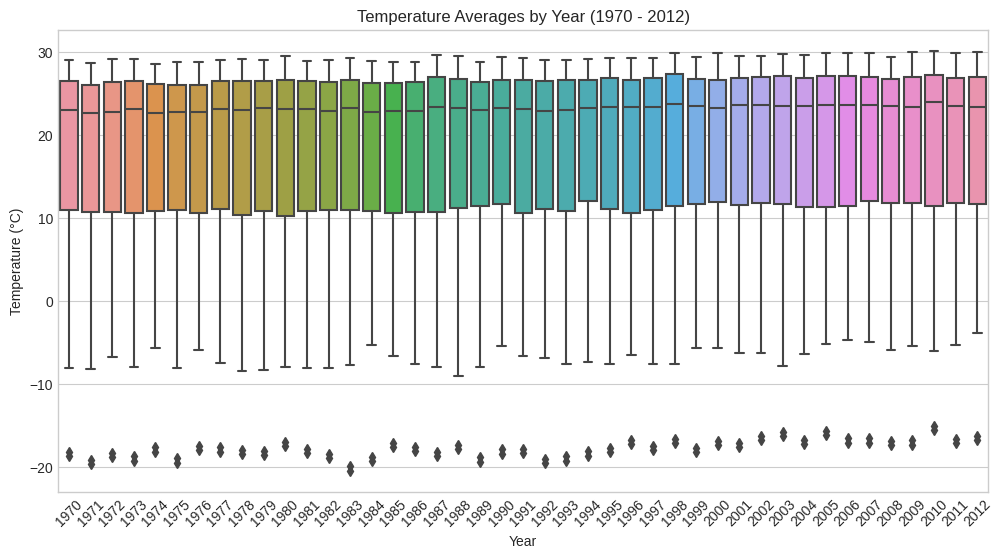

In [ ]:

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_Temp_avg.drop(columns=["Country"]))
plt.xticks(rotation=45)
plt.title("Temperature Averages by Year (1970 - 2012)")
plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.show()

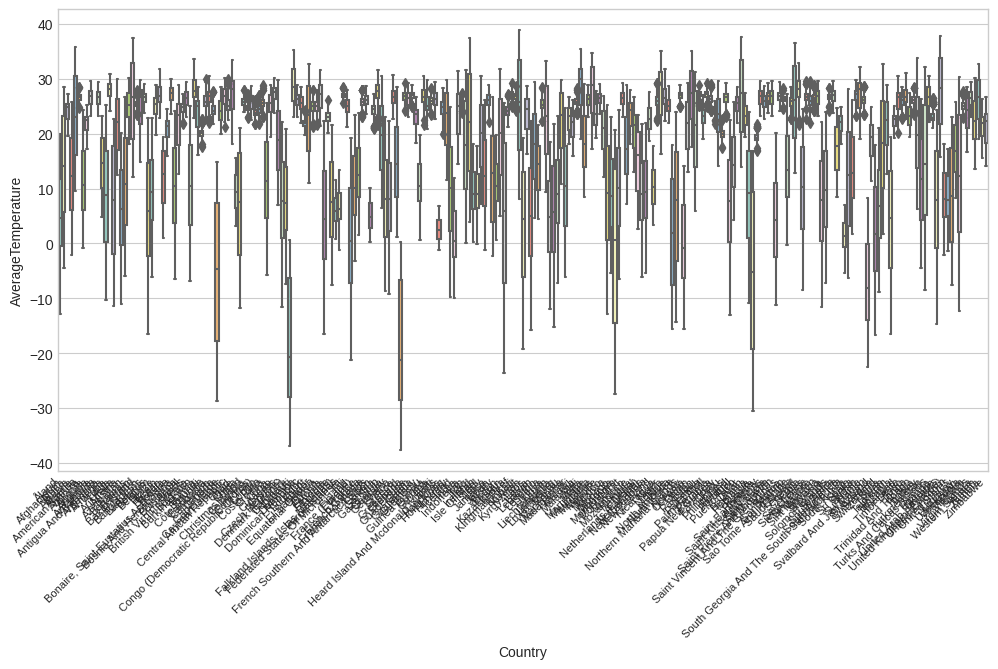

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="Country", y="AverageTemperature", data=data_temp_country, palette="Set3")
plt.xticks(rotation=45, ha="right", fontsize=8)
plt.show()

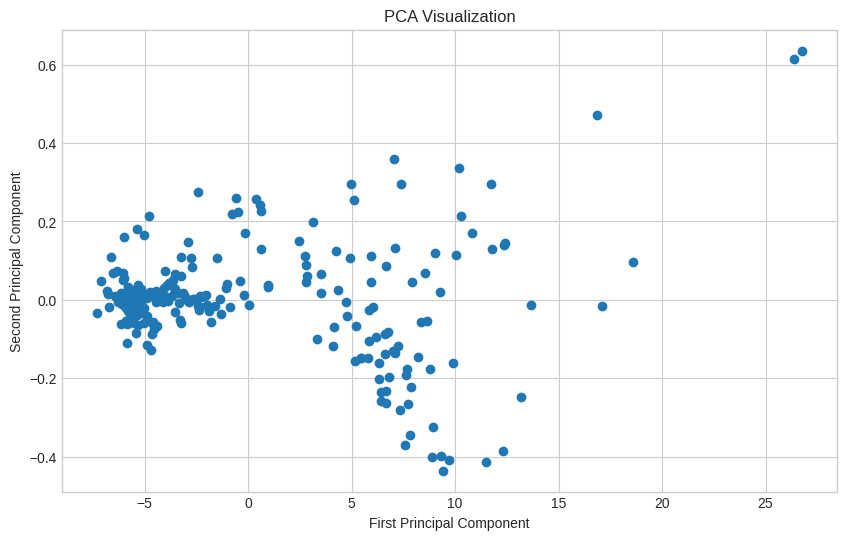

In [ ]:
scaler = StandardScaler()
scaled_df_Temp_avg = scaler.fit_transform(df_Temp_avg.drop("Country", axis=1))

pca = PCA()
pca_df_Temp_avg = pca.fit_transform(scaled_df_Temp_avg)
plt.figure(figsize=(10, 6))
plt.scatter(pca_df_Temp_avg[:, 0], pca_df_Temp_avg[:, 1])
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.title("PCA Visualization")
plt.show()

# Question: What is the relationship between Temperature and Time with every Country in the World

## GMM Algorithm

I will be performing the Gaussian Mixture Model (GMM) on the annual temperature data for each country. Because the GMM requires numerical input, we need to transform the 'Country' column into a numerical format using one-hot encoding.

In [ ]:
# Convert categorical variables to dummy/indicator variables
country_dummies = pd.get_dummies(df_Temp_avg['Country'])

In [ ]:
df_Temp_avg_dropped = df_Temp_avg.copy(deep=True)

In [ ]:
df_numerical = df_Temp_avg_dropped.drop(['Country'], axis=1)

In [ ]:
df_Temp_avg1 = pd.concat([country_dummies, df_numerical], axis=1)
df_Temp_avg1.columns = df_Temp_avg1.columns.astype(str)

In [ ]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df_Temp_avg1)

In [ ]:
gmm = GaussianMixture(n_components=3)
gmm.fit(scaled_df)

GaussianMixture(n_components=3)

I will be using 3 n-components

In [ ]:
preds = gmm.predict(scaled_df)

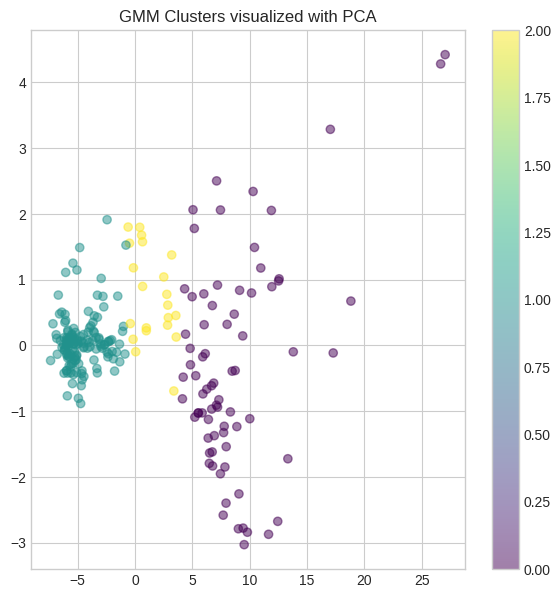

In [ ]:
# Perform PCA for the visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_df)

plt.figure(figsize=(7, 7))
plt.scatter(
    pca_result[:, 0],
    pca_result[:, 1],
    c=preds,  # use predictions for coloring
    alpha=0.5,
    cmap="viridis",
)
plt.colorbar()
plt.title('GMM Clusters visualized with PCA')
plt.show()


In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# # Scaling the data
# scaler = StandardScaler()
# scaled_data = scaler.fit_transform(df_Temp_avg.loc[:, "1970":"2012"])


# Expectation step
#labels = gmm.predict(scaled_df)

# Maximization step
gmm.means_ = np.array([scaled_df[preds == i].mean(axis=0) for i in range(4)])

# Compute SSE
sse = np.sum((scaled_df - gmm.means_[preds])**2)

# Compute Silhouette Score
silhouette = silhouette_score(scaled_df, preds)

print(f"SSE: {sse}")
print(f"Silhouette Score: {silhouette}")


SSE: 59796.450396582186
Silhouette Score: 0.03217845915592175


<ipython-input-62-b1fc7d43ae00>:14: RuntimeWarning: Mean of empty slice.
  gmm.means_ = np.array([scaled_df[preds == i].mean(axis=0) for i in range(4)])
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


By combining GMM and PCA, we can visualize the clusters in a two-dimensional plot even if the original data had many dimensions (one for each year). This way, we get a snapshot of how countries group together based on their temperature profiles over the years.

## Spectral Clustering

In [ ]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()

    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)

    # Draw the ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))

def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')

    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)


<ipython-input-64-f18a1943f45f>:18: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax.add_patch(Ellipse(position, nsig * width, nsig * height,


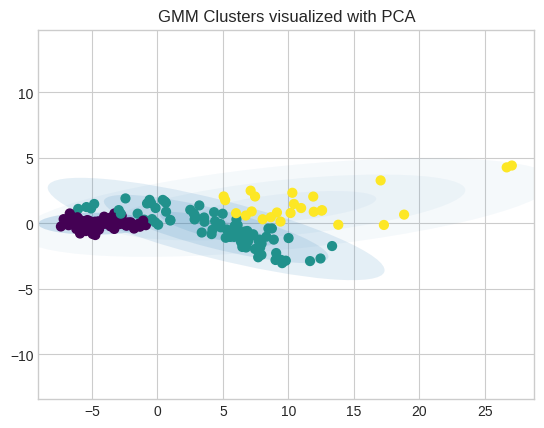

In [ ]:
# Fitting the Gaussian Mixture Model
gmm = GaussianMixture(n_components=3)
gmm.fit(scaled_df)

# Getting the cluster assignments
preds = gmm.predict(scaled_df)

# Fit the GaussianMixture model on the reduced data
gmm_pca = GaussianMixture(n_components=3, covariance_type='full', random_state=0)
gmm_pca.fit(pca_result)

# Plotting the clusters along with the ellipses
plot_gmm(gmm_pca, pca_result)
plt.title('GMM Clusters visualized with PCA')
plt.show()


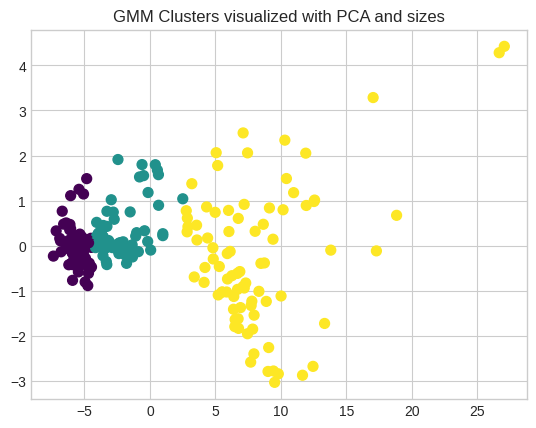

In [ ]:
size = 50 * probs.max(1) ** 2
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=preds, cmap='viridis', s=size)
plt.title('GMM Clusters visualized with PCA and sizes')
plt.show()


Gaussian Mixture Models as Density Estimation
- Fundamentally it is an algorithm for density estimation.
- Result of a GMM fit a generative probabilistic model describing the distribution of the data.


GMM is fundamentally a probabilistic model that assumes all the data points are generated from a mixture of a finite number of Gaussian distributions with unknown parameters. In your case, this could mean that we are assuming the data (countries with their associated PCA-transformed features) are generated from a mixture of underlying Gaussian distributions (or clusters).

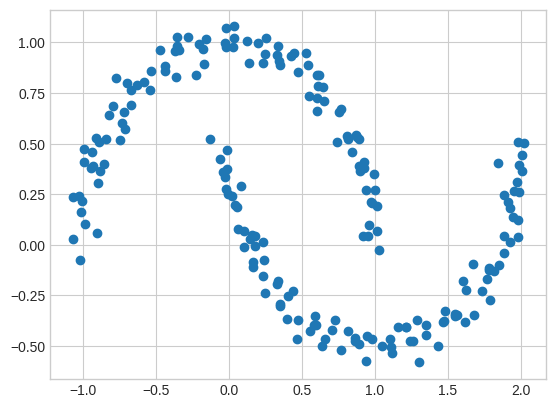

In [ ]:
# Generate data using make_moons
Xmoon, ymoon = make_moons(200, noise=.05, random_state=0)
plt.scatter(Xmoon[:, 0], Xmoon[:, 1])
plt.show()

<ipython-input-64-f18a1943f45f>:18: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax.add_patch(Ellipse(position, nsig * width, nsig * height,


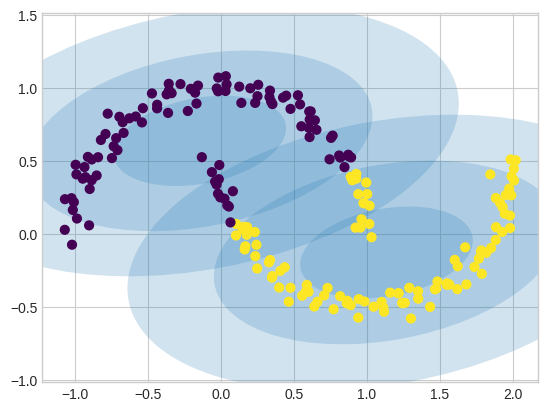

In [ ]:
# Fit a 2-component Gaussian Mixture Model
gmm2 = GaussianMixture(n_components=2, covariance_type='full', random_state=0)
gmm2.fit(Xmoon)
plot_gmm(gmm2, Xmoon)

Different GMMs are being fit to the data with different numbers of components (clusters). Each GMM is trying to explain your data as a mixture of a certain number of Gaussian distributions. For instance, when fitting a 2-component GMM we group all countries into 2 clusters based on their similarities. A 16-component GMM is trying to find 16 clusters.

<ipython-input-64-f18a1943f45f>:18: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax.add_patch(Ellipse(position, nsig * width, nsig * height,


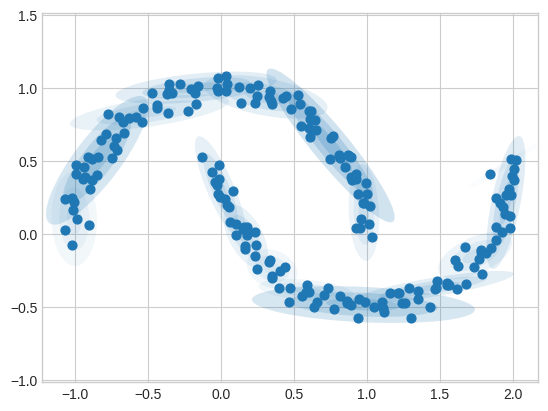

In [ ]:
# Fit a 16-component Gaussian Mixture Model
gmm16 = GaussianMixture(n_components=16, covariance_type='full', random_state=0)
gmm16.fit(Xmoon)
plot_gmm(gmm16, Xmoon, label=False)

The 16-component GMM can be used to generate new data. These would be new, synthetic countries that are created based on the 16 clusters found in the real data.

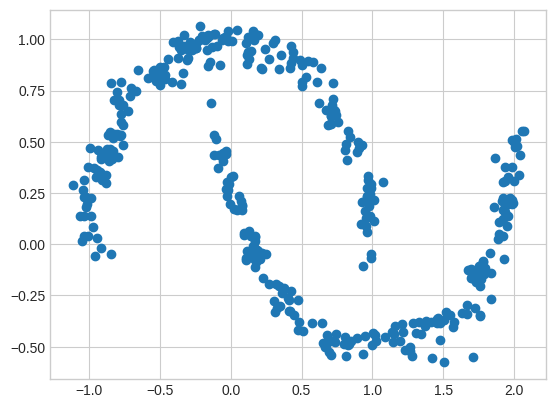

In [ ]:
# Generate new data points from the 16-component GMM
Xnew, ynew = gmm16.sample(400)
plt.scatter(Xnew[:, 0], Xnew[:, 1])
plt.show()

In [ ]:
# Fit the Gaussian Mixture Model on the PCA reduced data
gmm_pca = GaussianMixture(n_components=16, covariance_type='full', random_state=0)
gmm_pca.fit(pca_result)

GaussianMixture(n_components=16, random_state=0)

<ipython-input-64-f18a1943f45f>:18: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax.add_patch(Ellipse(position, nsig * width, nsig * height,


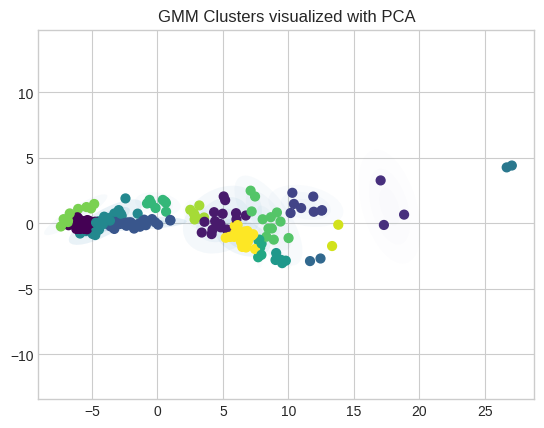

In [ ]:
# Plot the GMM on PCA data
plot_gmm(gmm_pca, pca_result)
plt.title('GMM Clusters visualized with PCA')
plt.show()

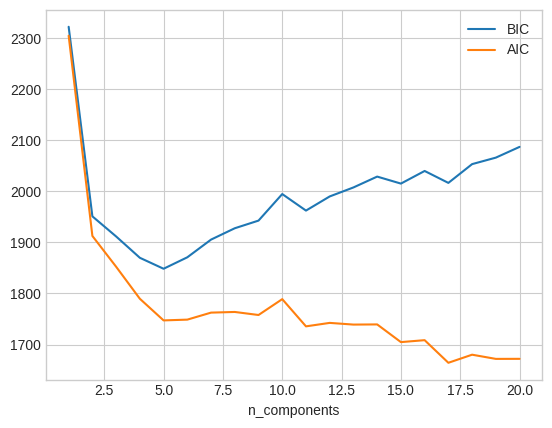

In [ ]:
# Determine optimal number of components
n_components = np.arange(1, 21)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(pca_result)
          for n in n_components]

plt.plot(n_components, [m.bic(pca_result) for m in models], label='BIC')
plt.plot(n_components, [m.aic(pca_result) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')
plt.show()


The optimal number of clusters is the value that minimizes the AIC or BIC, depending on which approximation we wish to use. The AIC tells us that our choice of 16 components earlier was probably too many: around 8–12 components would have been a better choice. As is typical with this sort of problem, the BIC recommends a simpler model.

Determining the optimal number of components: Using AIC and BIC, we can estimate the optimal number of Gaussian components (clusters) to represent our data. These are statistical measures that trade-off model complexity (more clusters) against how well the model fits the data. AIC and BIC help in preventing overfitting by introducing a penalty term for the number of parameters in the model (the more parameters, the more complex the model).


## Hierarchical Cluster

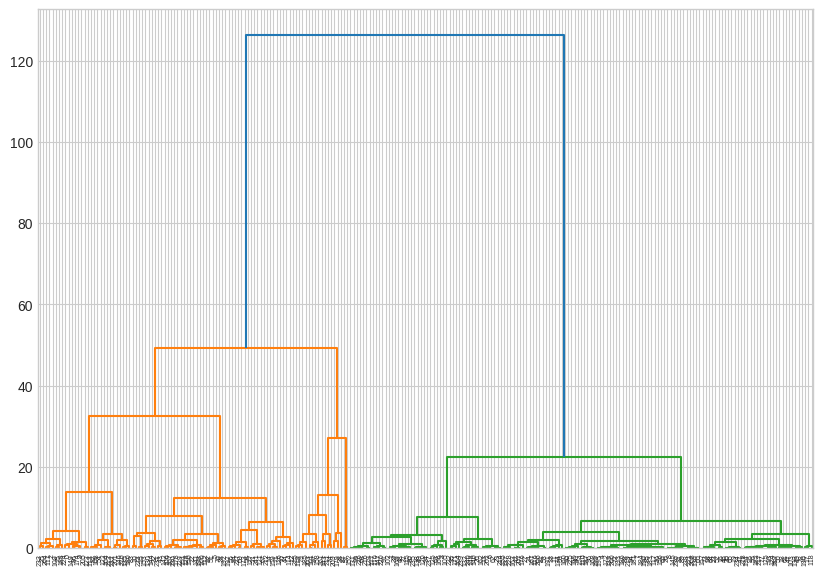

In [ ]:

# Generate the linkage matrix using Ward's method
linked = linkage(pca_result, 'ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import numpy as np

# Define the optimal number of clusters for your dataset.
n_clusters = 3

# Perform Agglomerative Clustering
hca = AgglomerativeClustering(n_clusters=n_clusters)
hca_labels = hca.fit_predict(pca_result)

# Compute the silhouette score
silhouette_avg = silhouette_score(pca_result, hca_labels)
print(f"For n_clusters = {n_clusters}, the average silhouette_score is : {silhouette_avg}")


def compute_sse(X, labels):
    unique_labels = np.unique(labels)
    centroids = [np.mean(X[labels == label], axis=0) for label in unique_labels]
    sse = sum(np.linalg.norm(X[labels == label] - centroid)**2
              for label, centroid in zip(unique_labels, centroids))
    return sse


sse = compute_sse(pca_result, hca_labels)
print(f"The SSE for n_clusters = {n_clusters} is : {sse}")


For n_clusters = 3, the average silhouette_score is : 0.6551357183805283
The SSE for n_clusters = 3 is : 1682.7770030381187


##K-means Clustering

In [ ]:
from sklearn import cluster
def get_country_names(labels):
  r=len(set(labels))
  country_clusters={}
  for index,value in enumerate(labels):
    if value not in country_clusters.keys():
      country_clusters[value]=[df_Temp_avg['Country'].iloc[index]]
    else:
      country_clusters[value].append(df_Temp_avg['Country'].iloc[index])



  return country_clusters

In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_Temp_avg.loc[:,1970:2012])

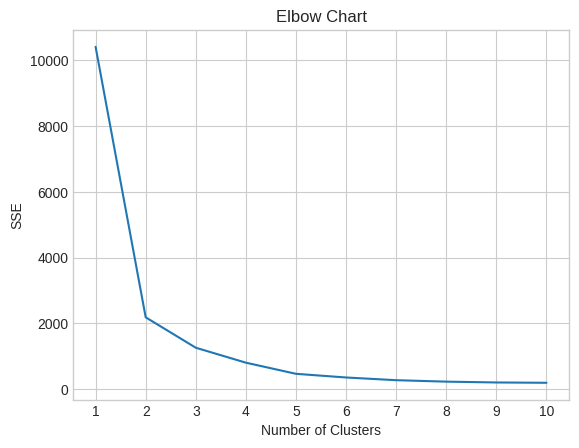

In [ ]:
#initialize kmeans parameters
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"random_state": 1,
}

#create list to hold SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)
#df_co2_final.loc[:,1970:2021]
#visualize results
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.title("Elbow Chart")
plt.show()

In [ ]:
from sklearn import cluster
def get_country_names(labels):
  r=len(set(labels))
  country_clusters={}
  for index,value in enumerate(labels):
    if value not in country_clusters.keys():
      country_clusters[value]=[df_Temp_avg['Country'].iloc[index]]
    else:
      country_clusters[value].append(df_Temp_avg['Country'].iloc[index])



  return country_clusters

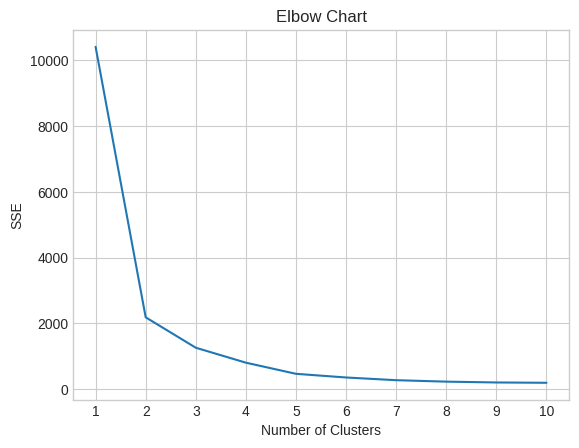

In [ ]:
#initialize kmeans parameters
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"random_state": 1,
}

#create list to hold SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)
#df_co2_final.loc[:,1970:2021]
#visualize results
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.title("Elbow Chart")
plt.show()

{2: 0.7488437345097799, 3: 0.7223712020084562, 4: 0.6319411541364226, 5: 0.6025424862138017, 6: 0.5939633812331594, 7: 0.5808221741108754, 8: 0.5904164814268368, 9: 0.5956291449777418, 10: 0.5162955838469501}


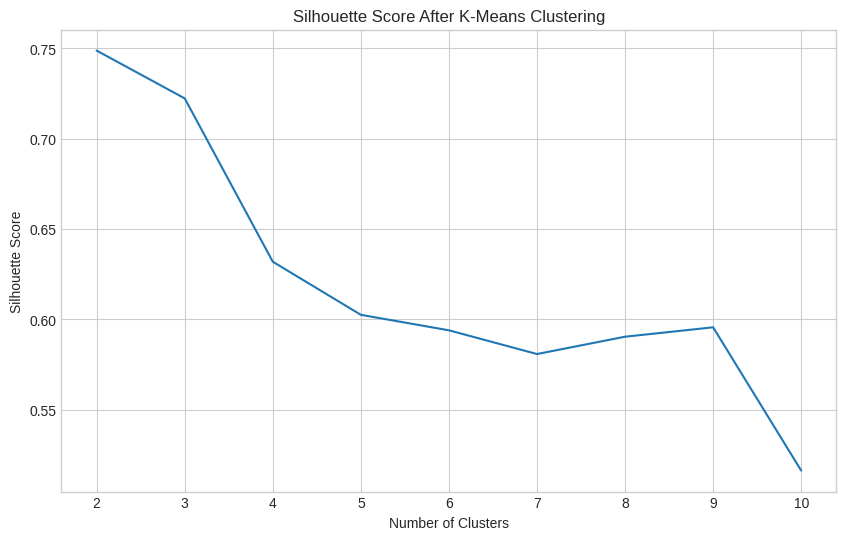

In [ ]:
silhouette_score={}
for k in range(2, 11):
  kmeans = KMeans(n_clusters=k,  random_state=10, n_init=10)
  kmeans.fit(scaled_data)
  silhouette_score[k] = metrics.silhouette_score(scaled_data, kmeans.labels_, random_state=10, metric= 'euclidean')
plt.figure(figsize=(10,6))
plt.plot(list(silhouette_score.keys()), list(silhouette_score.values()))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score After K-Means Clustering")
print(silhouette_score)

In [ ]:
# Compute the SSE
sse = kmeans.inertia_
print("SSE:", sse)


SSE: 800.1580099446074


In [ ]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(scaled_data)
y_kmeans = kmeans.predict(scaled_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


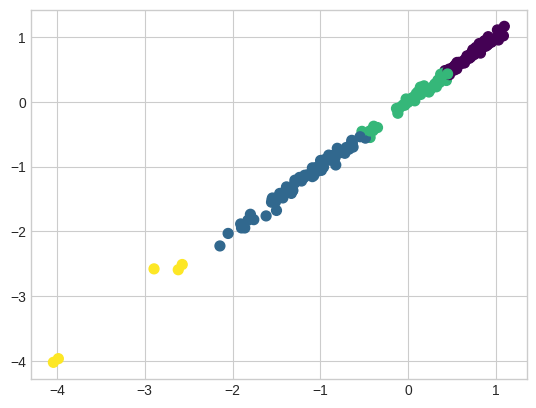

In [ ]:
def plot_scatter(df1,df2,labels):
  plt.scatter(scaled_data[:, 0], scaled_data[:, 42], c=labels, s=50, cmap='viridis')

plot_scatter(scaled_data[:, 0],scaled_data[:, 42],y_kmeans)

In [ ]:
cluster_kmeans=get_country_names(y_kmeans)

In [ ]:
cluster_kmeans

{2: ['Afghanistan',
  'Angola',
  'Argentina',
  'Australia',
  'Bolivia',
  'Botswana',
  'Burundi',
  'Cyprus',
  'Ecuador',
  'Gaza Strip',
  'Greece',
  'Hong Kong',
  'Iran',
  'Iraq',
  'Israel',
  'Jordan',
  'Lebanon',
  'Libya',
  'Macau',
  'Malawi',
  'Malta',
  'Mexico',
  'Morocco',
  'Namibia',
  'Nepal',
  'Oceania',
  'Pakistan',
  'Peru',
  'Portugal',
  'Rwanda',
  'San Marino',
  'South Africa',
  'South America',
  'Swaziland',
  'Syria',
  'Taiwan',
  'Tanzania',
  'Tunisia',
  'Turkmenistan',
  'Uruguay',
  'Western Sahara',
  'Zambia',
  'Zimbabwe'],
 0: ['Africa',
  'Algeria',
  'American Samoa',
  'Anguilla',
  'Antigua And Barbuda',
  'Aruba',
  'Bahamas',
  'Bahrain',
  'Baker Island',
  'Bangladesh',
  'Barbados',
  'Belize',
  'Benin',
  'Bonaire, Saint Eustatius And Saba',
  'Brazil',
  'British Virgin Islands',
  'Burkina Faso',
  'Burma',
  'Cambodia',
  'Cameroon',
  'Cape Verde',
  'Cayman Islands',
  'Central African Republic',
  'Chad',
  'Christmas 

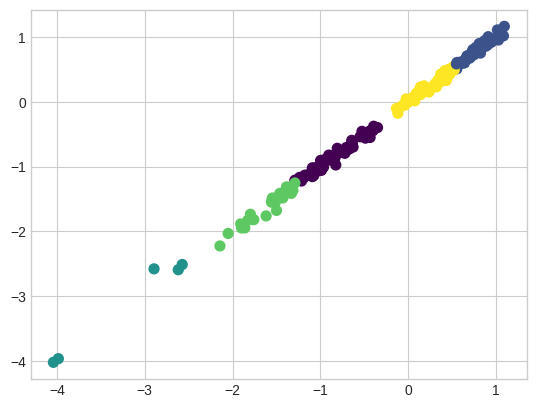

In [ ]:
kmeans_5cluster = KMeans(n_clusters=5, n_init=10)
kmeans_5cluster.fit(scaled_data)
y_kmeans_5cluster = kmeans_5cluster.predict(scaled_data)
plot_scatter(scaled_data[:, 0],scaled_data[:, 42],y_kmeans_5cluster)

In [ ]:
cluster_5kmeans=get_country_names(y_kmeans_5cluster)
cluster_5kmeans

{0: ['Afghanistan',
  'Albania',
  'Andorra',
  'Argentina',
  'Armenia',
  'Asia',
  'Azerbaijan',
  'Belgium',
  'Bhutan',
  'Bosnia And Herzegovina',
  'Bulgaria',
  'Chile',
  'Croatia',
  'Czech Republic',
  'Denmark (Europe)',
  'Europe',
  'France',
  'France (Europe)',
  'Georgia',
  'Germany',
  'Greece',
  'Guernsey',
  'Hungary',
  'Ireland',
  'Isle Of Man',
  'Italy',
  'Japan',
  'Jersey',
  'Lesotho',
  'Luxembourg',
  'Macedonia',
  'Moldova',
  'Monaco',
  'Montenegro',
  'Nepal',
  'Netherlands',
  'Netherlands (Europe)',
  'New Zealand',
  'Poland',
  'Portugal',
  'Romania',
  'San Marino',
  'Serbia',
  'Slovakia',
  'Slovenia',
  'South Korea',
  'Spain',
  'Turkey',
  'Turkmenistan',
  'Ukraine',
  'United Kingdom',
  'United Kingdom (Europe)',
  'United States',
  'Uzbekistan'],
 1: ['Africa',
  'American Samoa',
  'Anguilla',
  'Antigua And Barbuda',
  'Aruba',
  'Bahamas',
  'Bahrain',
  'Baker Island',
  'Bangladesh',
  'Barbados',
  'Belize',
  'Benin',
  'B

In [ ]:
kmeans_3cluster = KMeans(n_clusters=3, n_init=10)
kmeans_3cluster.fit(scaled_data)
y_kmeans_3cluster = kmeans_3cluster.predict(scaled_data)

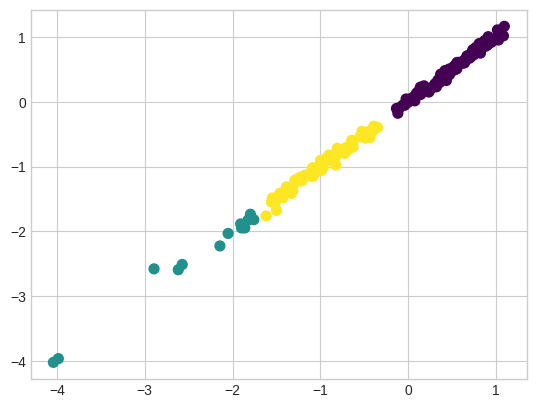

In [ ]:
plot_scatter(scaled_data[:, 0],scaled_data[:, 42],y_kmeans_3cluster)

In [ ]:
cluster_3kmeans=get_country_names(y_kmeans_3cluster)
cluster_3kmeans

{2: ['Afghanistan',
  'Albania',
  'Andorra',
  'Argentina',
  'Armenia',
  'Asia',
  'Austria',
  'Azerbaijan',
  'Belarus',
  'Belgium',
  'Bhutan',
  'Bosnia And Herzegovina',
  'Bulgaria',
  'Chile',
  'China',
  'Croatia',
  'Czech Republic',
  'Denmark (Europe)',
  'Estonia',
  'Europe',
  'Falkland Islands (Islas Malvinas)',
  'Faroe Islands',
  'France',
  'France (Europe)',
  'French Southern And Antarctic Lands',
  'Georgia',
  'Germany',
  'Greece',
  'Guernsey',
  'Hungary',
  'Ireland',
  'Isle Of Man',
  'Italy',
  'Japan',
  'Jersey',
  'Kazakhstan',
  'Kyrgyzstan',
  'Latvia',
  'Lesotho',
  'Liechtenstein',
  'Lithuania',
  'Luxembourg',
  'Macedonia',
  'Moldova',
  'Monaco',
  'Montenegro',
  'Nepal',
  'Netherlands',
  'Netherlands (Europe)',
  'New Zealand',
  'North Korea',
  'Poland',
  'Portugal',
  'Romania',
  'Saint Pierre And Miquelon',
  'San Marino',
  'Serbia',
  'Slovakia',
  'Slovenia',
  'South Korea',
  'Spain',
  'Switzerland',
  'Tajikistan',
  'Tur

## Spectral Clustering: Finding the Golden Cluster

In [ ]:

kmeans = KMeans(n_clusters=10)
kmeans.fit(scaled_data)
centroids = kmeans.cluster_centers_

# Perform K-means clustering on the centroids
kmeans_centroids = KMeans(n_clusters=5)
kmeans_centroids.fit(centroids)
final_centroids = kmeans_centroids.cluster_centers_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Step 1.1: Define Objective Functions

To find the golden cluster: To minimize the variance within clusters.

In [ ]:

kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(scaled_data)

within_cluster_variances = []

for i in range(kmeans.n_clusters):
    cluster_samples = scaled_data[labels == i]
    cluster_variance = np.var(cluster_samples, axis=0)
    within_cluster_variances.append(cluster_variance)

within_cluster_variances = np.array(within_cluster_variances)

for i, variance in enumerate(within_cluster_variances):
    print(f'Variance of cluster {i}: {variance}')


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Variance of cluster 0: [0.03567422 0.03677261 0.03666145 0.03545459 0.03835422 0.03598193
 0.03682185 0.0371576  0.03647563 0.03459081 0.03656372 0.03827296
 0.03726172 0.03814699 0.03770622 0.03433976 0.03582366 0.03487926
 0.03529445 0.0371154  0.03760616 0.03567466 0.0379404  0.03638631
 0.03628058 0.03688264 0.03574543 0.03842244 0.03608237 0.03808661
 0.04079042 0.0384908  0.03733489 0.03781108 0.03922434 0.03847665
 0.0402076  0.04071664 0.0385055  0.03897775 0.03868932 0.0425944
 0.03948328]
Variance of cluster 1: [0.12494291 0.11986039 0.109933   0.10699692 0.11310954 0.11924983
 0.12421849 0.11994625 0.11596838 0.12436676 0.10714891 0.12101125
 0.1191855  0.11385916 0.11240912 0.12700221 0.1138685  0.11898494
 0.11822167 0.12329207 0.12353005 0.10243419 0.11479624 0.11126437
 0.14470665 0.12135403 0.11054698 0.10999994 0.11990465 0.12460831
 0.12455484 0.12014124 0.12303401 0.11879295 0.11001154 0.1080643
 0.11114951 0.12654572 0.11952946 0.12517894 0.12692976 0.11842446
 0.13

In [ ]:
min_variance_cluster = np.argmin(np.sum(within_cluster_variances, axis=1))
print(f'Cluster with minimum variance: {min_variance_cluster}')


Cluster with minimum variance: 0


Among all the clusters formed by the K-Means algorithm, the cluster labeled as '0' has the least within-cluster variance. The data points within this cluster are more similar to each other compared to the data points in other clusters.

This could indicate that the countries in this cluster have similar patterns of temperature change over the years.

This cluster has the lowest variance and therefore the most similar countries in terms of crop production.

In [ ]:
# Assuming you have already executed the previous code to calculate SSE and Silhouette scores

# Find the index of the minimum SSE value
min_sse_index = np.argmin(sse)

# Find the index of the maximum Silhouette score
max_silhouette_index = np.argmax(silhouette_scores)

# Check if the index of the minimum SSE value matches the index of the maximum Silhouette score
if min_sse_index == max_silhouette_index:
    golden_cluster = min_sse_index + 2  # Add 2 to get the actual number of clusters (k)
    print("Golden Cluster:", golden_cluster)
else:
    print("No Golden Cluster found. SSE and Silhouette scores do not align.")


No Golden Cluster found. SSE and Silhouette scores do not align.


OPTICS Algorithm

In [ ]:
df_melt = df_Temp_avg.melt(id_vars='Country', var_name='Year', value_name='avgTemp')

# Group by 'Country' and calculate the mean and standard deviation of 'avgTemp'
X = df_melt.groupby('Country')['avgTemp'].agg(['mean', 'std']).values

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
# Configure the OPTICS clustering algorithm
clust = OPTICS(min_samples=50, xi=0.05, min_cluster_size=0.05)

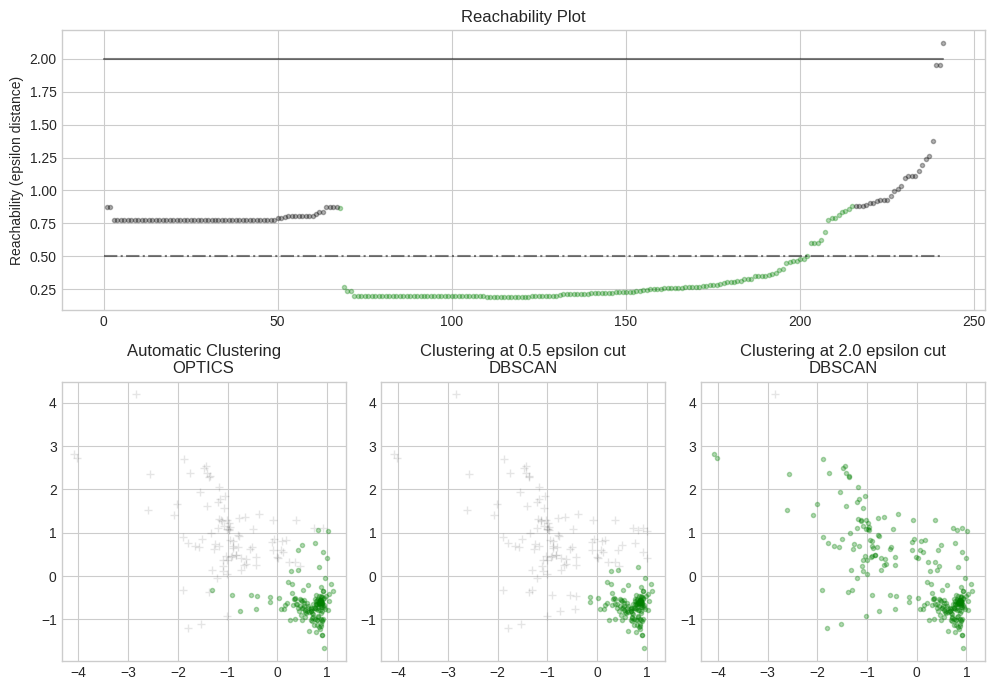

In [ ]:


clust.fit(X)

labels_050 = cluster_optics_dbscan(
    reachability=clust.reachability_,
    core_distances=clust.core_distances_,
    ordering=clust.ordering_,
    eps=0.5,
)
labels_200 = cluster_optics_dbscan(
    reachability=clust.reachability_,
    core_distances=clust.core_distances_,
    ordering=clust.ordering_,
    eps=2,
)

space = np.arange(len(X))
reachability = clust.reachability_[clust.ordering_]
labels = clust.labels_[clust.ordering_]

plt.figure(figsize=(10, 7))
G = gridspec.GridSpec(2, 3)
ax1 = plt.subplot(G[0, :])
ax2 = plt.subplot(G[1, 0])
ax3 = plt.subplot(G[1, 1])
ax4 = plt.subplot(G[1, 2])

# Reachability plot
colors = ['g.', 'r.', 'b.', 'y.', 'c.']
for klass, color in zip(range(0, 5), colors):
    Xk = space[labels == klass]
    Rk = reachability[labels == klass]
    ax1.plot(Xk, Rk, color, alpha=0.3)
ax1.plot(space[labels == -1], reachability[labels == -1], 'k.', alpha=0.3)
ax1.plot(space, np.full_like(space, 2., dtype=float), 'k-', alpha=0.5)
ax1.plot(space, np.full_like(space, 0.5, dtype=float), 'k-.', alpha=0.5)
ax1.set_ylabel('Reachability (epsilon distance)')
ax1.set_title('Reachability Plot')

# OPTICS
colors = ['g.', 'r.', 'b.', 'y.', 'c.']
for klass, color in zip(range(0, 5), colors):
    Xk = X[clust.labels_ == klass]
    ax2.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3)
ax2.plot(X[clust.labels_ == -1, 0], X[clust.labels_ == -1, 1], 'k+', alpha=0.1)
ax2.set_title('Automatic Clustering\nOPTICS')

# DBSCAN at 0.5
colors = ['g.', 'r.', 'b.', 'c.']
for klass, color in zip(range(0, 4), colors):
    Xk = X[labels_050 == klass]
    ax3.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3)
ax3.plot(X[labels_050 == -1, 0], X[labels_050 == -1, 1], 'k+', alpha=0.1)
ax3.set_title('Clustering at 0.5 epsilon cut\nDBSCAN')

# DBSCAN at 2.
colors = ['g.', 'm.', 'y.', 'c.']
for klass, color in zip(range(0, 4), colors):
    Xk = X[labels_200 == klass]
    ax4.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3)
ax4.plot(X[labels_200 == -1, 0], X[labels_200 == -1, 1], 'k+', alpha=0.1)
ax4.set_title('Clustering at 2.0 epsilon cut\nDBSCAN')

plt.tight_layout()
plt.show()


Reachability Plot: This plot shows the reachability distances computed by OPTICS. <br>
Each point represents a data point, and they are plotted in the order generated by OPTICS. The y-axis is the reachability distance, which is the distance between a point and its nearest neighbor that has not yet been visited by the algorithm. The colors distinguish the different clusters. <br>
OPTICS Clustering: This plot shows the clusters found by OPTICS. Each point is a country, and the axes are the standardized mean and standard deviation of avgTemp. <br>
DBSCAN Clustering at 0.5 epsilon cut: This plot shows the clusters that would be found by DBSCAN at an epsilon of 0.5. <br>
DBSCAN Clustering at 2.0 epsilon cut: This plot shows the clusters that would be found by DBSCAN at an epsilon of 2.0.

What story is the data telling us? What business problem can be solved using the data?

This is a time-series data analysis. We can interpret many results based on this data. Analyzing average temperatures based on different countries around the world can reveal interesting insights about climate change trends. <br> Climate Change Analysis: The data provides insights into how the climate has been changing over the years. Businesses in sectors sensitive to climate change, such as agriculture and energy, can use this information for long-term planning.
There are many business problems that can be solved using our data. One of the main ones that we are hoping to work on are:
- Agriculture: Understanding climate trends can significantly benefit the agricultural industry. Farming operations can be optimized based on the temperature data and its forecast. Also, risks such as droughts or floods can be better managed with prior knowledge of weather patterns.
- Energy Sector: Weather significantly influences energy demand. For instance, colder climates increase the demand for heating, and warmer climates increase the demand for cooling. Energy companies can use this data to forecast demand and optimize their operations.

---



In [ ]:
import matplotlib.pyplot as plt

In [ ]:
X['Temperature_Change']

Year,2018,2019,2020,2021
Country,,,,
Canada,-2,-1,0,1
USA,-1,0,1,2


In [ ]:
X['CO2']

Year,2018,2019,2020,2021
Country,,,,
Canada,20,25,30,28
USA,30,40,35,45


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load CO2 data for each country for the past 10 years into a pandas dataframe
df = data_c02
df = df[df['Year'] >= 2011].pivot(index='Year', columns='Country', values='CO2')

# Preprocess the data by removing any missing values and normalizing the data
df.dropna(inplace=True)
scaler = StandardScaler()
df_norm = scaler.fit_transform(df)

# Use Box-Counting method to generate fractal dimensions for each data point
def box_counting(data):
    L = len(data)
    n = int(np.log2(L))
    counts = []
    scales = []
    for i in range(n):
        scale = 2 ** i
        scales.append(scale)
        count = 0
        for j in range(0, L, scale):
            if np.sum(data[j:j+scale]) > 0:
                count += 1
        counts.append(count)
    return np.log(scales), np.log(counts)

fractal_dims = []
for i in range(df_norm.shape[1]):
    x, y = box_counting(df_norm[:, i])
    p = np.polyfit(x, y, 1)
    fractal_dims.append(p[0])

# Use KMeans algorithm to cluster the data based on their fractal dimensions
kmeans = KMeans(n_clusters=3)
kmeans.fit(np.array(fractal_dims).reshape(-1, 1))

# Visualize the results using matplotlib to plot the yearly CO2 emissions for each country and color code them based on their assigned cluster
fig, ax = plt.subplots(figsize=(10, 6))
for i, country in enumerate(df.columns):
    ax.plot(df.index, df[country], label=country, c=plt.cm.Set1(kmeans.labels_[i] / 3.))
ax.legend()
plt.xlabel('Year')
plt.ylabel('CO2 Emissions')
plt.show()